In [60]:
# Imports principales: visualización, manipulación de datos y métricas
import matplotlib.pyplot as plt  # para graficar
import pandas as pd  # para manejar dataframes
import numpy as np  # operaciones numéricas
import sys  # utilidades del sistema (opcional)
from sklearn.datasets import fetch_california_housing  # ejemplo de dataset (no usado aquí)
from sklearn.linear_model import LinearRegression  # regresión lineal de sklearn
from sklearn.model_selection import train_test_split  # dividir datos
from sklearn.metrics import mean_squared_error, r2_score  # métricas de evaluación

In [61]:
# Cargar el dataset desde archivo CSV
df = pd.read_csv('bmi.csv')  # leer el archivo 'bmi.csv' en un DataFrame
df  # mostrar las primeras filas al ejecutar la celda

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


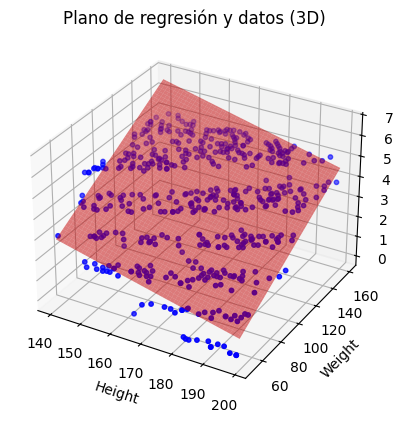

In [62]:
# Definimos las variables independiente y dependiente
# X: matriz con las características Height y Weight (cada columna es una feature)
X = df[['Height', 'Weight']]   # variables independientes (DataFrame)
y = df['Index']                # variable dependiente (Series)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()  # instancia del modelo
modelo.fit(X, y)  # ajustar a todos los datos (aquí no hacemos split)

# Predicciones sobre el mismo conjunto para visualizar el plano
y_pred = modelo.predict(X)

# Configurar figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos reales: cada punto es (Height, Weight, Index)
ax.scatter(df['Height'], df['Weight'], df['Index'], s=10, c='blue', depthshade=True)

# Crear una malla de valores (x_surf, y_surf) para representar el plano predicho
import numpy as np  # asegurar que numpy está disponible
x_surf, y_surf = np.meshgrid(
    np.linspace(df['Height'].min(), df['Height'].max(), 100),
    np.linspace(df['Weight'].min(), df['Weight'].max(), 100),
)
# Evaluar el modelo sobre la malla (aplanar, predecir y volver a dar forma)
z_surf = modelo.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_surf.reshape(x_surf.shape)

# Graficar el plano de regresión (superficie roja semitransparente)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Index')
plt.title('Plano de regresión y datos (3D)')
plt.show()


**Conclusión (Gráfico 3D - Plano de regresión):**
- El plano (superficie roja) muestra la aproximación lineal del modelo sobre Height y Weight.
- Si los puntos azules están cercanos al plano, la regresión lineal explica bien la variabilidad del índice.
- Desviaciones grandes indican errores de predicción que se reflejarán en métricas como MSE y R².

In [63]:
# Función auxiliar para entrenar un regresor lineal y devolver parámetros y pérdida
from sklearn.linear_model import LinearRegression  # modelo lineal
from sklearn.metrics import mean_squared_error  # métrica MSE
import matplotlib.pyplot as plt  # para posibles visualizaciones

def training_sklearn(X, y):
    # Crear el modelo LinearRegression
    modelo = LinearRegression()  # instancia del regresor

    # Entrenar el modelo con los datos X (features) e y (target)
    modelo.fit(X, y)  # ajusta coeficientes y el intercept

    # Obtener predicciones sobre los datos de entrada
    y_hat = modelo.predict(X)  # predicciones del modelo

    # Calcular pérdida MSE entre valores reales y predichos
    loss = mean_squared_error(y, y_hat)  # mean squared error

    # Extraer coeficientes (weights) y bias (intercept)
    weights = modelo.coef_      # array con coeficientes por feature
    bias = modelo.intercept_    # valor escalar del intercept

    return weights, bias, loss  # devolver parámetros y pérdida

# Llamar a la función de entrenamiento usando los datos cargados (X,y) y mostrar resultados
# Asegúrese de que 'X' e 'y' estén definidos en celdas anteriores antes de ejecutar esto
weights, bias, loss = training_sklearn(X, y)
print("weights:", weights)
print("bias:", bias)
print("loss:", loss)

weights: [-0.03496865  0.03367515]
bias: 6.121145990109021
loss: 0.3190251550466902


In [64]:
# Preparar datos y dividir en entrenamiento/prueba
import numpy as np  # arrays y operaciones numéricas
from sklearn.model_selection import train_test_split  # para dividir dataset
from sklearn.linear_model import LinearRegression  # regresor lineal

# Construcción de X con Height y Weight (2 columnas)
X = np.array(df[['Height', 'Weight']])   # forma (n_samples, 2)
y = np.array(df['Index'])  # vector objetivo

# División de datos: aquí test_size=0.3 significa 30% para prueba, 70% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar dimensiones para verificar que la división es correcta
print('X_train.shape, y_train.shape =', X_train.shape, y_train.shape)

# Entrenar un regresor lineal usando los datos de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)  # ajustar modelo

# Predicciones sobre el conjunto de prueba para evaluación
y_pred = modelo.predict(X_test)


X_train.shape, y_train.shape = (350, 2) (350,)


In [65]:
# Mostrar los coeficientes (pesos) del modelo entrenado
# modelo.coef_ devuelve un array con un coeficiente por feature
print("Pesos (w):", modelo.coef_)


Pesos (w): [-0.03744653  0.03459841]


In [66]:
# Re-entrenar (si no está ya entrenado) y mostrar el intercepto (bias)
modelo = LinearRegression()
modelo.fit(X_train, y_train)  # ajuste del modelo en X_train

# Bias (intercepto): valor que se suma a la combinación lineal X·w
print("Bias (b):", modelo.intercept_)


Bias (b): 6.44402387916251


In [67]:
# Normalizar los datos y entrenar con SGDRegressor para obtener costos por época
from sklearn.preprocessing import StandardScaler  # para escalado de features
from sklearn.linear_model import SGDRegressor  # regresor con descenso de gradiente estocástico
from sklearn.metrics import mean_squared_error  # para calcular MSE

# Escalar características (importante para SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear modelo SGDRegressor (entrena iterativamente)
modelo_sgd = SGDRegressor(max_iter=300, random_state=42, eta0=0.01)

# Lista para guardar costos por iteración
costos = []

# Entrenar y guardar costo en cada época usando partial_fit
for epoch in range(300):
    modelo_sgd.partial_fit(X_train_scaled, y_train)
    y_pred_train = modelo_sgd.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_pred_train)
    costos.append(mse)

# Guardar coeficientes y bias finales
w_sgd = modelo_sgd.coef_
b_sgd = modelo_sgd.intercept_

# Predicción en test escalado
y_pred_test = modelo_sgd.predict(X_test_scaled)

print(f"w (SGD): {w_sgd}")
print(f"b (SGD): {b_sgd}")


w (SGD): [-0.62103062  1.13229717]
b (SGD): [3.72064678]


**Conclusión (Costo vs Épocas - SGD):**
- La gráfica de costos muestra cómo disminuye (o no) el error durante las iteraciones del SGD.
- Una caída pronunciada indica aprendizaje efectivo; si la curva es plana, la tasa de aprendizaje puede ser demasiado baja.

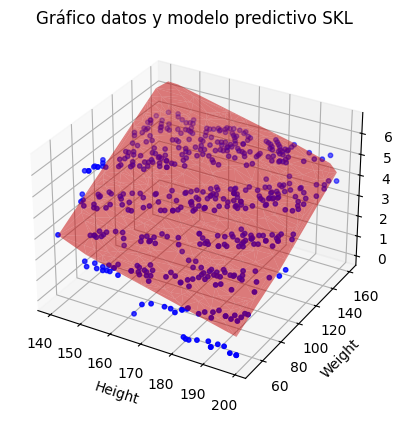

In [68]:
# Gráfico 3D de datos y del modelo predictivo (usando LinearRegression ajustado a X,y)
X_full = df[['Height','Weight']].values   # matriz con dos columnas
y_full = df['Index'].values               # vector objetivo

# Entrenar modelo global para visualizar
modelo_global = LinearRegression()
modelo_global.fit(X_full, y_full)
y_hat = modelo_global.predict(X_full)

# Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
ax.scatter(X_full[:,0], X_full[:,1], y_full, s=10, c='blue')
# Superficie aproximada por el modelo
ax.plot_trisurf(X_full[:,0], X_full[:,1], y_hat, color='red', alpha=0.5)

ax.set_xlabel('Height'); ax.set_ylabel('Weight'); ax.set_zlabel('Index')
plt.title('Gráfico datos y modelo predictivo SKL')
plt.show()


**Conclusión (Gráfico datos y modelo predictivo):**
- El plano rojo muestra la predicción del modelo; los puntos azules son observaciones reales.
- Si los puntos están próximos al plano, el modelo tiene buen ajuste; si están dispersos, hay error de predicción.

In [69]:
# División para evaluación final y comparación con sklearn
X = df[['Height','Weight']].values
y = df['Index'].values

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar y predecir
modelo = LinearRegression().fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Comparar y calcular costo
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())
print("Costo (MSE):", mean_squared_error(y_test, y_pred))


   Actual  Predicted
0       4   3.968401
1       2   2.317743
2       4   3.224549
3       4   3.321199
4       4   4.132258
Costo (MSE): 0.3362022483992543


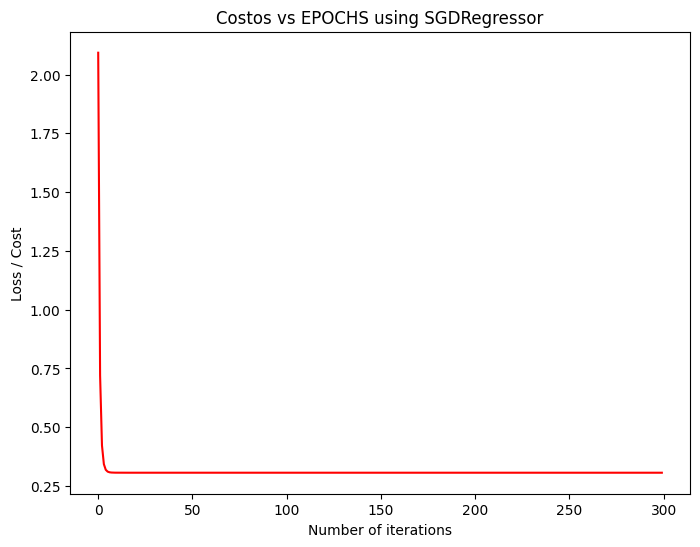

In [70]:
# Gráfico de la función de costo usando SGDRegressor (ya entrenado arriba)
import matplotlib.pyplot as plt

# 'costos' fue calculado durante el entrenamiento con modelo_sgd
plt.figure(figsize=(8,6))
plt.plot(range(len(costos)), costos, 'r-')  # costos por iteración
plt.xlabel('Number of iterations')
plt.ylabel('Loss / Cost')
plt.title('Costos vs EPOCHS using SGDRegressor')
plt.show()


**Conclusión (Costos vs Épocas):**
- La gráfica muestra cómo cambia el MSE durante las iteraciones del método SGD.
- Una disminución sostenida indica que el algoritmo está convergiendo al mínimo local.

In [71]:
# Cálculo de métricas de regresión para evaluar el modelo final
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_test: valores reales
# y_pred: predicciones del modelo (calculadas arriba)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 0.3362022483992543
MAE: 0.4670723963132593
RMSE: 0.5798294994213853
R²: 0.7981858164360079


**Interpretación de métricas:**
- **MSE** (Mean Squared Error): promedio de los errores al cuadrado; valores menores indican mejor ajuste.
- **MAE** (Mean Absolute Error): promedio de errores absolutos; más interpretable en unidades originales.
- **RMSE**: raíz cuadrada de MSE; representa error medio en las mismas unidades que la variable objetivo.
- **R²**: proporción de varianza explicada por el modelo; 1 = perfecto, 0 = no explica variabilidad.

In [72]:
# Simular una muestra nueva (ejemplo de 'paciente') y predecir con el modelo entrenado
import numpy as np

# Definir nuevo paciente: [Height, Weight]
nuevo_paciente = np.array([[175, 70]])   # Height=175 cm, Weight=70 kg

# Si el modelo que usamos para predecir fue el entrenado con X_train escalado (SGD),
# debemos escalar la nueva muestra con el mismo scaler usado en entrenamiento:
try:
    nuevo_paciente_scaled = scaler.transform(nuevo_paciente)
except NameError:
    # si no existe 'scaler', asumimos que el modelo espera valores sin escalar
    nuevo_paciente_scaled = nuevo_paciente

# Elegir el modelo correcto para la predicción: modelo (LinearRegression) o modelo_sgd (SGDRegressor)
# Aquí usamos 'modelo' (LinearRegression) si está definido
try:
    prediccion = modelo.predict(nuevo_paciente)
except NameError:
    prediccion = modelo_sgd.predict(nuevo_paciente_scaled)

print("Paciente nuevo:", nuevo_paciente)
print("Predicción del índice:", prediccion[0])


Paciente nuevo: [[175  70]]
Predicción del índice: 2.324753595147813
